In [9]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3156231 sha256=50fba234a08db034efdbf8a488053306d8e1a2d1bc0c3a727467ca546bb18113
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [2]:
# Load the MovieLens dataset
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [3]:
# Merge the dataframes
movie_ratings = pd.merge(ratings, movies, on='movieId')

In [4]:
movie_ratings

,userId,movieId,rating,timestamp,title,genres
0,1,296.0,5.0,1.147880e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296.0,5.0,1.439474e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296.0,4.0,1.573939e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296.0,4.0,8.307862e+08,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296.0,4.0,8.354447e+08,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
1226154,8277,744.0,3.0,8.460677e+08,Brothers in Trouble (1995),Drama
1226155,8277,770.0,3.0,8.460678e+08,Costa Brava (1946),Drama
1226156,8277,1065.0,3.0,8.423765e+08,Five Angles on Murder (1950),Mystery
1226157,8277,1109.0,3.0,8.471976e+08,Charm's Incidents (Charms Zwischenfälle) (1996),Drama


In [5]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1226159 entries, 0 to 1226158
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1226159 non-null  int64  
 1   movieId    1226159 non-null  float64
 2   rating     1226159 non-null  float64
 3   timestamp  1226159 non-null  float64
 4   title      1226159 non-null  object 
 5   genres     1226159 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 65.5+ MB


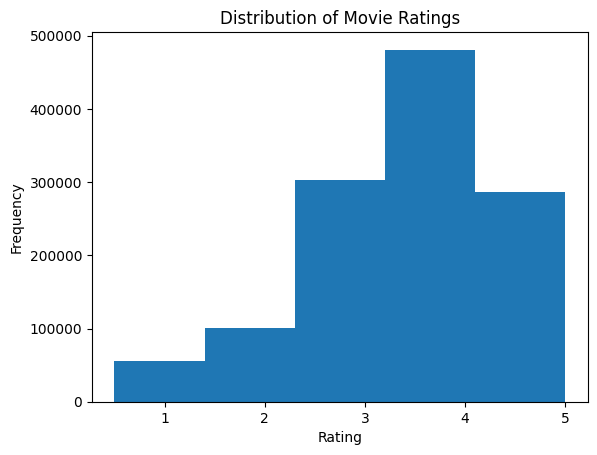

In [7]:
# Create a histogram of movie ratings
plt.hist(ratings['rating'], bins=5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

In [11]:
# Load data into Surprise's Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(movie_ratings[['userId', 'movieId', 'rating']], reader)

In [12]:
# Split data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

In [13]:
# Create and train an SVD model
model = SVD()
model.fit(trainset)

In [14]:
# Make predictions on the test set
predictions = model.test(testset)

In [15]:
# Evaluate the model's performance
accuracy.rmse(predictions)

RMSE: 0.8326


0.8326288896304201